# Diamonds - Quality vs. Price

**Hypothesis:** Based on the diamonds dataset lower quality ('cut') diamonds have higher price than the higher quality diamonds

In order to validate (or reject) this hypothesis, we will explore a dataset of a 50K diamonds and explain our findings with analytic proofs.

## 0. Import Libraries

First of all, we will import all the libraries of Python that will help us along the way.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

import os
os.chdir('C:\\Users\\user11\\Desktop\\DS Projects')

## 1. Load Dataset

In [8]:
#Load dataset as dataframe from .csv
df = pd.read_csv('Diamonds.csv')

We loaded the dataset as 'df' and we will start our data exploration.

In [9]:
#Show the first 5 lines to get the first insights on how data look
print ('Dataset has ' + str(df.shape[0]) + ' rows (diamonds) and ' + str(df.shape[1]) + ' features')
df. head()

Dataset has 53940 rows (diamonds) and 11 features


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Before we start data exploration, first let's clean the data a bit more by removing the first column as it is just the index.

In [21]:
#Drop the first column named 'Unnamed: 0'
df = df.drop(columns= 'Unnamed: 0', axis = 1)

## 2. Data Exploration

Let's get some basic information on the data.

In [24]:
#Basic statistical information on all the numerical columns of the data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Already we can see that the prices of diamonds ranges between 326 to 18,823 USD! We can see that the average price is about 4,000 USD and the median is about 2,400 USD. This means we don't have too many diamonds that are too expensive.

We need to check for missing values in order to know if the above numbers generalize the whole dataset.

In [26]:
#Number of missing values in each feature
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Great to see no missing values in the dataset. 

Now we can start exploring the data more in depth. Let's visualize the price values to get some insights about possible outliers.

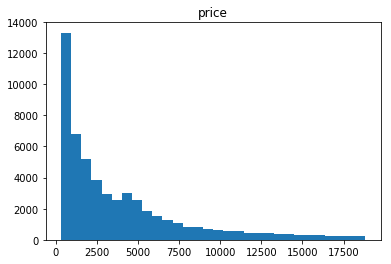

In [45]:
df.hist('price', bins=30, grid=False);

We can see we have a highly skewed price values. This does not mean there are outliers though, as the values are logical and possible. Still we can double check ourselves with a boxplot to see if we can spot any outliers or extreme values.

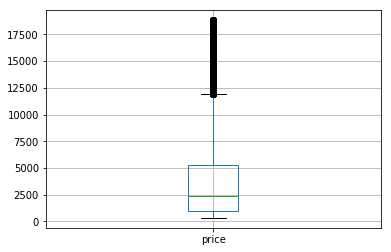

In [28]:
df.boxplot(column = 'price');

Even though we have lot's of prices above the 'box' it seems they all increase gradually. Thus, hard to say if there are actually outliers at least because of the price.

In order to take care of the skewness of the prices we can normalize them and that can give us an even better view. Easiest and most intuitive way to do it would be log transformation.

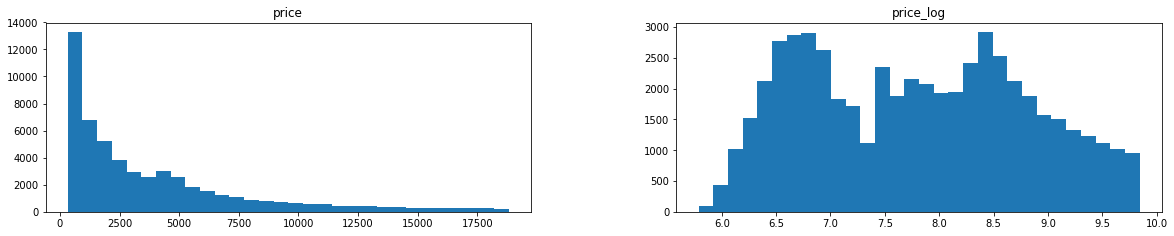

In [46]:
df['price_log'] = df['price'].apply(np.log)

fig = plt.figure(figsize=(20, 8));

ax1 = fig.add_subplot(221)
df.hist('price', bins=30, grid=False, ax=ax1);
ax2 = fig.add_subplot(222)
df.hist('price_log', bins=30, grid=False, ax=ax2);

Let's see how the price is distributed in different quality values.

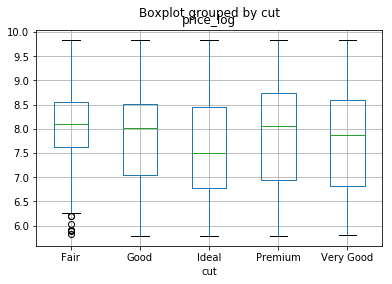

In [50]:
df.boxplot(column = 'price_log', by='cut');

It's not so easy to decide if there is actually a connection between the quality and the price of a diamond just by looking at this plot. It can help to see it in numbers.

In [51]:
df.groupby('cut').agg({'price': 'mean', 'price_log':'mean', 'table': 'count'}) \
  .rename(columns={'price': 'Avg_price', 'price_log': 'avg_log_price', 'table' : 'n_diamonds'})

,Avg_price,avg_log_price,n_diamonds
cut,,,
Fair,4358.757764,8.093441,1610
Good,3928.864452,7.842809,4906
Ideal,3457.541970,7.639467,21551
Premium,4584.257704,7.950795,13791
Very Good,3981.759891,7.798664,12082


As we can see also in the table, it's hard to say that there is a direct correlation between the price and the quality of a diamond. The average price in each type of cut (quality) is pretty close to each other. **However**, we also see that the data is kind of biased on 'ideal' quality and above as there are only 1610 fair cut diamonds whereas more than 20,000 ideal cut diamonds. Let's see it also as a simple bar plot.

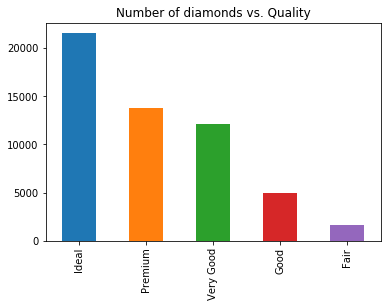

In [34]:
qualitycount = df['cut'].value_counts()
qualitycount.plot(kind='bar');
plt.title('Number of diamonds vs. Quality');

In order to get a smarter view on things, we should take into account also the sizes of diamonds. Intuitively, a much bigger fair quality diamond would cost higher than a very small premium quality. So, let's check that out!

In [35]:
#Size of a diamond is basically the volume of it (x*y*z)
df['size'] = df['x'] * df['y'] * df['z']

In [41]:
df.groupby('cut').agg({'size':'mean'})

,size
cut,
Fair,164.950549
Good,136.257267
Ideal,115.394912
Premium,145.052128
Very Good,130.999722


Here we can see that on average fair cut diamonds are bigger than the the rest. Is it the same with the price?

In [49]:
#Check the correlation between the price and the size
df['price_log'].corr(df['size'])

0.9004122902117596

There we go, as we can see, there is a very high correlation (the highest would be 1) between the price and the size of a diamond, which confirms our intuitive sub-hypothesis.

## 3. Results

We started with the hypothesis that claims that the lower the quality of a diamond the higher the price and our goal was to either validate or reject it with both numerical and visual proofs.

After exploring the data, we can say that the hypothesis is **not correct**. In the beginning, we checked as the data is given and showed that we can't really validate the hypothesis. So, we decided dwelve deeper. 

We showed the data is actually biased and we checked for the effect of other features such as size and number of the diamonds in the data. However, also there we failed to accurately validate the hypothesis.

On the other hand, we showed a very strong positive correlation between the price and the size of the diamond rather than quality of it. This is a good beginning for a new hypothesis which we can check deeper and get into more details in the future. Important to say that this report only considered tje length, width and depth values of the diamond without really getting into the details of more sophisticated features such as depth or table of a diamond which possibly would effect our final hypothesis.